In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
base_dir = "E:/Dataset"
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

In [3]:
img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   zoom_range=0.1)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

val_data = val_test_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='binary')

test_data = val_test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_height, img_width),
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 shuffle=False)

Found 30405 images belonging to 2 classes.
Found 21428 images belonging to 2 classes.
Found 6001 images belonging to 2 classes.


In [4]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])



c:\Users\abc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10)


c:\Users\abc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 990s 1s/step - accuracy: 0.7070 - loss: 0.5499 - val_accuracy: 0.6679 - val_loss: 0.6207
Epoch 2/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 484s 509ms/step - accuracy: 0.7978 - loss: 0.4218 - val_accuracy: 0.7662 - val_loss: 0.4822
Epoch 3/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 484s 508ms/step - accuracy: 0.8301 - loss: 0.3699 - val_accuracy: 0.7912 - val_loss: 0.4418
Epoch 4/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 484s 509ms/step - accuracy: 0.8535 - loss: 0.3316 - val_accuracy: 0.8179 - val_loss: 0.4055
Epoch 5/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 481s 506ms/step - accuracy: 0.8760 - loss: 0.2928 - val_accuracy: 0.8291 - val_loss: 0.3797
Epoch 6/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 484s 509ms/step - accuracy: 0.8888 - loss: 0.2623 - val_accuracy: 0.8478 - val_loss: 0.3547
Epoch 7/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 847s 891ms/step - accuracy: 0.8967 - loss: 0.2424 - val_accuracy: 0.8612 - val_loss: 0.3274
Epoch 8/10
951/951 ━━━━━━━━━━━━━━━━━━━━ 576s 605ms/step - accuracy: 0.9094 - lo

In [6]:
loss, accuracy = model.evaluate(test_data)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 428ms/step - accuracy: 0.8442 - loss: 0.3793

Test Accuracy: 86.40%


In [7]:
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step


In [8]:
print("\nClassification Report:")
print(classification_report(test_data.classes, y_pred_classes))

model.save("deepfake_detector_model.h5")


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3001
           1       0.85      0.89      0.87      3000

    accuracy                           0.86      6001
   macro avg       0.87      0.86      0.86      6001
weighted avg       0.87      0.86      0.86      6001



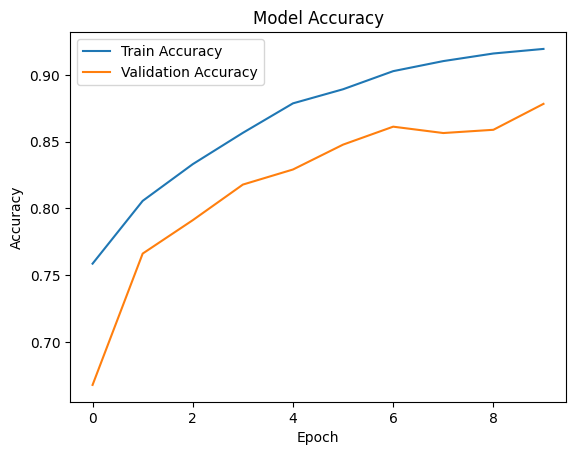

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
